### Doctor's Consultation Prediction

In [429]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [430]:
data = pd.read_excel("Fee_Final_Train.xlsx")

In [431]:
data = pd.DataFrame(data)

In [432]:
data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


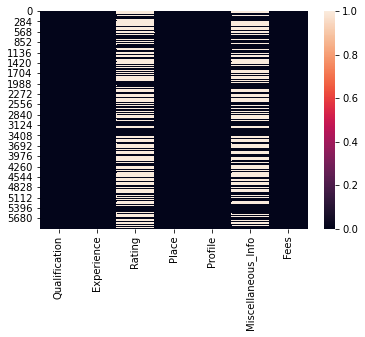

In [433]:
sns.heatmap(data.isnull())

In [434]:
data.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [435]:
#There are null values in Rating, place and MIscellanious columns

In [436]:
#converting Experience column to numbers
data['Experience'] = data.Experience.str.split("years experience",expand=True,)[0]

In [437]:
#fill null values with "Nan%" to extract numbers from the column
data.Rating.fillna("NaN%")

0       100%
1        98%
2       NaN%
3       NaN%
4       100%
        ... 
5956     98%
5957    NaN%
5958     97%
5959     90%
5960    100%
Name: Rating, Length: 5961, dtype: object

In [438]:
#Rating column is converted to numbers
data['Rating'] = data.Rating.str.split("%",expand=True,)[0]

In [439]:
#replace missing values in rating with median value
data.Rating.replace(np.nan,data.Rating.median(), inplace=True)

In [440]:
#replace the missing values with mode
data.Place.replace(np.nan,"HSR Layout, Bangalore", inplace=True)

In [441]:
#splitting Place to place and city
data[['place','city']] = data.Place.str.split(",",expand=True,).iloc[:,0:2]

In [442]:
data.drop("Place", inplace=True, axis=1)

In [443]:
data.Qualification.nunique()

1420

In [444]:
data.Qualification.value_counts()

BDS                                                                      488
BHMS                                                                     477
BAMS                                                                     471
MBBS                                                                     334
MBBS, MS - ENT                                                           220
                                                                        ... 
MSc - Endocrinology(UK), MBBS, Post Graduate Diploma in Endocrinology      1
MD - Dermatology, MBBS, Diploma in Medical Cosmetology                     1
MBBS, MD - Oncology, Diploma in Child Health (DCH)                         1
MBBS, MD - Dermatology, MD - Skin,VD & Leprosy                             1
BDS, PGDHHM                                                                1
Name: Qualification, Length: 1420, dtype: int64

In [445]:
qual_count = []
for i in data.Qualification:
    vals = i.split(",")
    qual_count.append(len(vals))
data["QualificationCount"] = qual_count

In [446]:
data.Profile.nunique()

6

In [447]:
data

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,place,city,QualificationCount
0,"BHMS, MD - Homeopathy",24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,2
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,2
2,"MBBS, MS - Otorhinolaryngology",9,97,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,2
3,"BSc - Zoology, BAMS",12,97,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,2
4,BAMS,20,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,1
...,...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Basavanagudi,Bangalore,2
5957,MBBS,33,97,General Medicine,NaN,100,Nungambakkam,Chennai,1
5958,MBBS,41,97,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Greater Kailash Part 2,Delhi,1
5959,"MBBS, MD - General Medicine",15,90,General Medicine,General Medical Consultation Viral Fever Treat...,100,Vileparle West,Mumbai,2


In [448]:
data.drop(["Qualification", "Miscellaneous_Info"], inplace=True, axis=1)

In [449]:
data

,Experience,Rating,Profile,Fees,place,city,QualificationCount
0,24,100,Homeopath,100,Kakkanad,Ernakulam,2
1,12,98,Ayurveda,350,Whitefield,Bangalore,2
2,9,97,ENT Specialist,300,Mathikere - BEL,Bangalore,2
3,12,97,Ayurveda,250,Bannerghatta Road,Bangalore,2
4,20,100,Ayurveda,250,Keelkattalai,Chennai,1
...,...,...,...,...,...,...,...
5956,19,98,ENT Specialist,300,Basavanagudi,Bangalore,2
5957,33,97,General Medicine,100,Nungambakkam,Chennai,1
5958,41,97,General Medicine,600,Greater Kailash Part 2,Delhi,1
5959,15,90,General Medicine,100,Vileparle West,Mumbai,2


In [450]:
data

,Experience,Rating,Profile,Fees,place,city,QualificationCount
0,24,100,Homeopath,100,Kakkanad,Ernakulam,2
1,12,98,Ayurveda,350,Whitefield,Bangalore,2
2,9,97,ENT Specialist,300,Mathikere - BEL,Bangalore,2
3,12,97,Ayurveda,250,Bannerghatta Road,Bangalore,2
4,20,100,Ayurveda,250,Keelkattalai,Chennai,1
...,...,...,...,...,...,...,...
5956,19,98,ENT Specialist,300,Basavanagudi,Bangalore,2
5957,33,97,General Medicine,100,Nungambakkam,Chennai,1
5958,41,97,General Medicine,600,Greater Kailash Part 2,Delhi,1
5959,15,90,General Medicine,100,Vileparle West,Mumbai,2


In [451]:
data["Experience"] = data["Experience"].apply(pd.to_numeric)

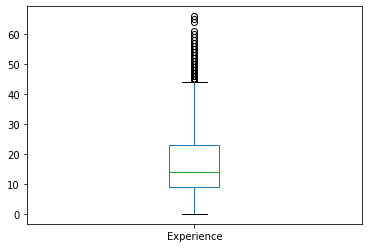

In [452]:
data.Experience.plot(kind="box")

In [453]:
data["Rating"] = data["Rating"].apply(pd.to_numeric)

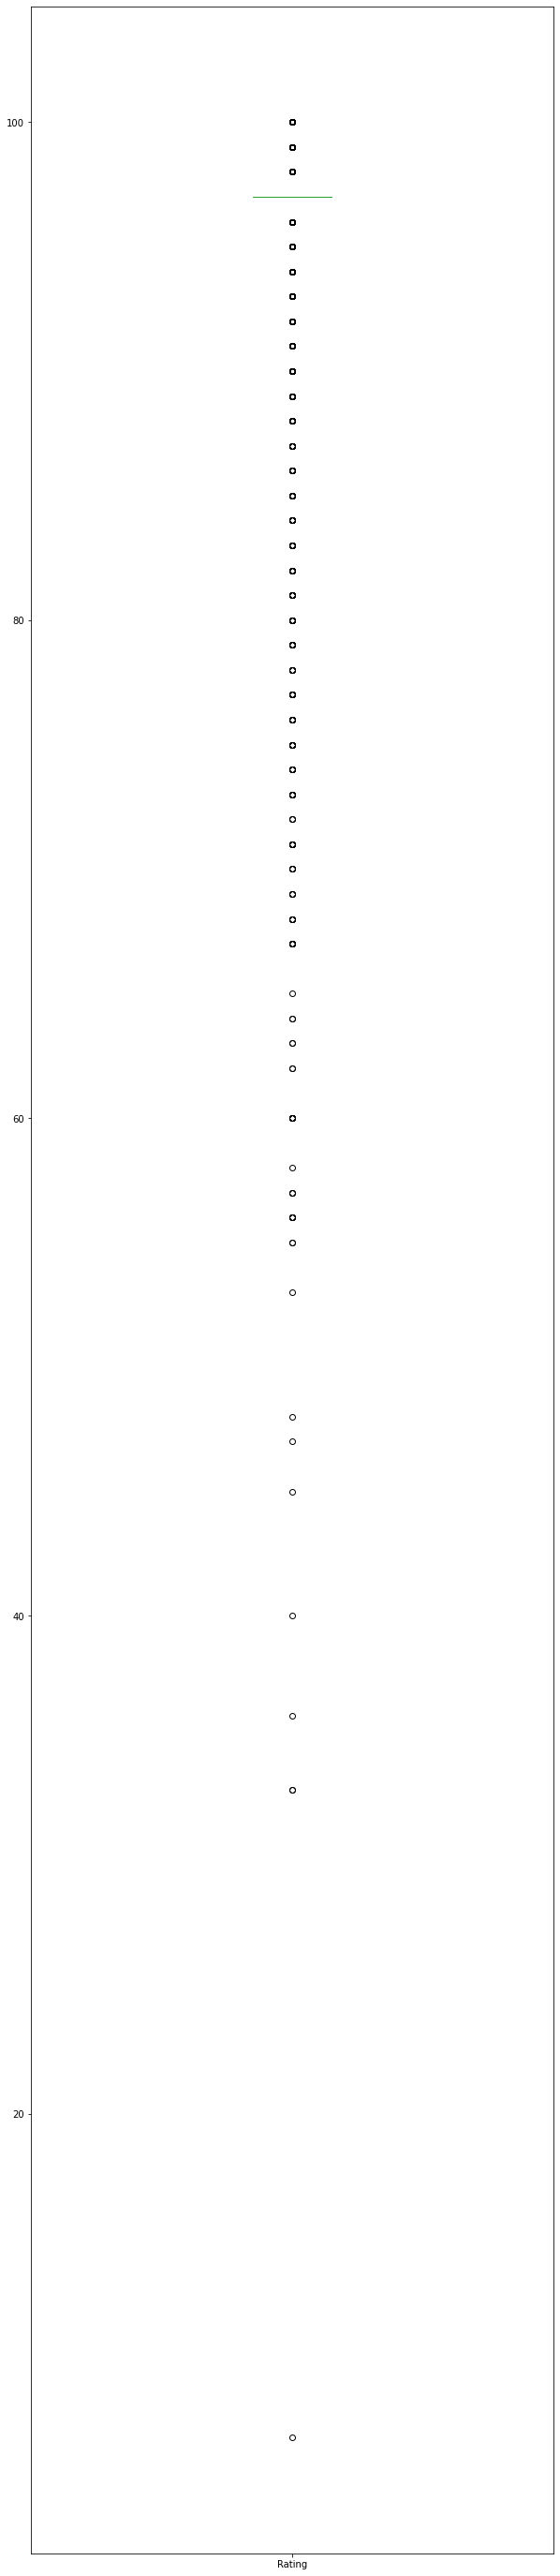

In [454]:
plt.figure(figsize=(10,50))
data.Rating.plot(kind="box")

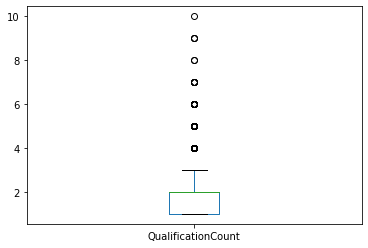

In [455]:
data.QualificationCount.plot(kind="box")

In [456]:
#Outliers in all numeric columns

In [457]:
data.skew()

Experience            0.991089
Rating               -5.257248
Fees                  0.751870
QualificationCount    1.433547
dtype: float64

In [458]:
#There are skews in every column

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


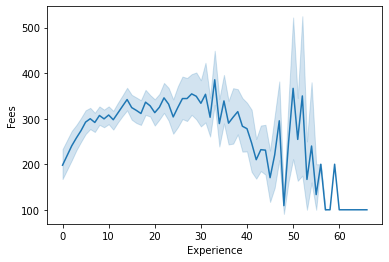

In [459]:
sns.lineplot(data.Experience, data.Fees)

In [460]:
#maximum fees for the doctors who has experience between 30-40 years

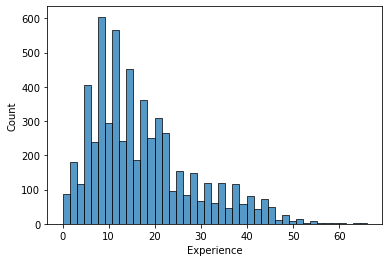

In [461]:
sns.histplot(data.Experience)

In [462]:
#more doctors hass experience between 5-15 years

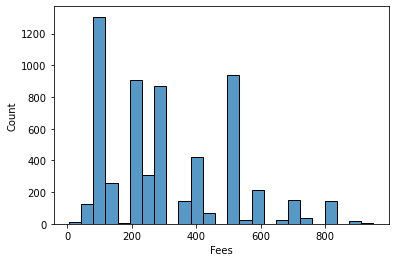

In [463]:
sns.histplot(data.Fees)

In [464]:
#in most of the places, fee is around 100

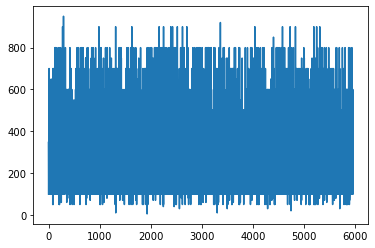

In [465]:
data.Fees.plot()

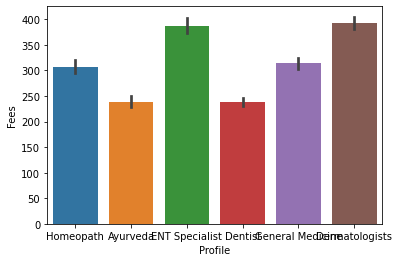

In [466]:
sns.barplot(x="Profile",y="Fees", data=data)

In [467]:
#When experience increasing, rate of change of fees is higher in dentists

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


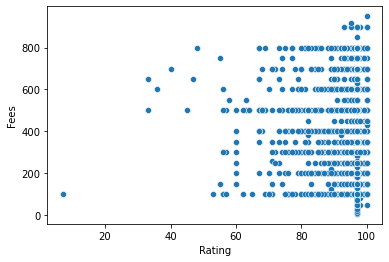

In [468]:
sns.scatterplot(data.Rating, data.Fees)

In [469]:
#rating is not pretty much related to the fee

In [470]:
data.city.nunique()

9

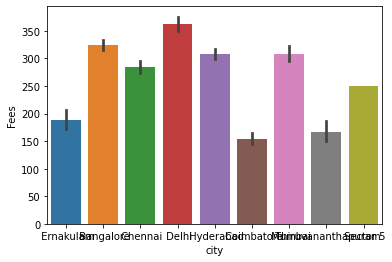

In [471]:
sns.barplot(x="city",y="Fees", data=data)

In [472]:
#large cities have higher fees

In [473]:
data.drop(["place"],inplace=True, axis=1)

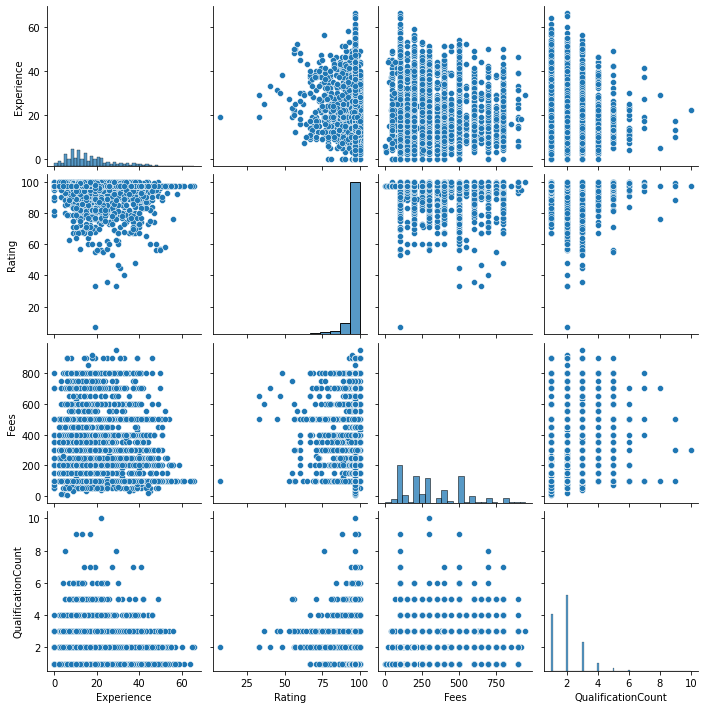

In [474]:
sns.pairplot(data)

In [475]:
from sklearn.preprocessing import LabelEncoder

In [476]:
data.head()

,Experience,Rating,Profile,Fees,city,QualificationCount
0,24,100.0,Homeopath,100,Ernakulam,2
1,12,98.0,Ayurveda,350,Bangalore,2
2,9,97.0,ENT Specialist,300,Bangalore,2
3,12,97.0,Ayurveda,250,Bangalore,2
4,20,100.0,Ayurveda,250,Chennai,1


In [483]:
data.city.fillna(str(data.city.mode()),inplace=True)

In [484]:
data.isnull().sum()

Experience            0
Rating                0
Profile               0
Fees                  0
city                  0
QualificationCount    0
dtype: int64

In [485]:
#encoding
columns = ["Profile", "city"]
for i in columns:
    try:
        le = LabelEncoder()
        le.fit(data[i])
        data[i] = le.transform(data[i])
    except Exception as e:
        print(str(e))

In [486]:
data.head()

,Experience,Rating,Profile,Fees,city,QualificationCount
0,24,100.0,5,100,4,2
1,12,98.0,0,350,0,2
2,9,97.0,3,300,0,2
3,12,97.0,0,250,0,2
4,20,100.0,0,250,1,1


In [493]:
from sklearn.preprocessing import power_transform

In [494]:
data.skew()

Experience            0.991089
Rating               -5.257248
Profile               0.108803
Fees                  0.751870
city                  0.054003
QualificationCount    1.433547
dtype: float64

In [496]:
columns = ["Experience", "Rating", "QualificationCount"]
for i in columns:
    data[i] = power_transform(np.array(data[i]).reshape(-1,1))

In [497]:
data.head()

,Experience,Rating,Profile,Fees,city,QualificationCount
0,0.737357,1.861651,5,100,4,0.246587
1,-0.325180,0.519380,0,350,0,0.246587
2,-0.688374,0.002247,3,300,0,0.246587
3,-0.325180,0.002247,0,250,0,0.246587
4,0.430174,1.861651,0,250,1,-1.266106


In [502]:
x = data.loc[:,data.columns != "Fees"]

In [516]:
y = data.iloc[:,3]

In [519]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [520]:
#finding best random state
max_acc = 0
max_rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    if r2 > max_acc:
        max_acc = r2
        max_rs = i
print("Best random state=",max_rs)

Best random state= 154


In [521]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = 154)

In [522]:
models = {"SVR":SVR(),"KNN":KNeighborsRegressor(), "RandomForest":RandomForestRegressor(),"LinearRegression":LinearRegression(), "Ridge":Ridge(), "dtr":DecisionTreeRegressor() }
acc = {}
mod_list = []
for i in models:
    mod = i
    mod = models[i]
    #mod = DecisionTreeRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    r2_sc = r2_score(y_test,pred)
    acc[i] = r2_sc
    mod_list.append(mod)
print(acc)

{'SVR': 0.062265317081705907, 'KNN': 0.08128946216349608, 'RandomForest': 0.04864120033222852, 'LinearRegression': 0.12598254876283865, 'Ridge': 0.12597540974828503, 'dtr': -0.44001734300984174}


In [523]:
#applying cross validation
from sklearn.model_selection import cross_val_score

In [524]:
cv_list = {}
for i in mod_list:
    cv = cross_val_score(i, x, y, cv=7)
    cv_list[str(i)] = cv.mean()
print(cv_list)

{'SVR()': 0.04484479139213222, 'KNeighborsRegressor()': 0.06739923642428261, 'RandomForestRegressor()': 0.02327918842848193, 'LinearRegression()': 0.09141850047269484, 'Ridge()': 0.09141862670158439, 'DecisionTreeRegressor()': -0.44573713241055685}
